In [108]:
# clear memory
%reset -f

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

In [110]:
%%time
file_path = '../data/cleaned/cleaned_taxi_data.csv'
chunksize = 10**6

with pd.read_csv(file_path, chunksize=chunksize) as reader:
    taxi_df = pd.concat([chunk for chunk in reader])

taxi_df.head()

Wall time: 39 s


,booking_id,name,driver_age,gender,car_model,car_make_year,accuracy,direction,acceleration_x,acceleration_y,...,MA (m/s^2),gyro_x,gyro_y,gyro_z,MAV (rad/s),second,duration (mins),speed (km/h),rating,safety_label
0,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-1.706207,-9.270792,...,9.503762,-0.028965,-0.032652,0.015390,0.046282,2.0,0.03,0.822436,4.0,0
1,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-1.416705,-9.548032,...,9.830320,-0.022413,0.005049,-0.025753,0.034511,3.0,0.05,0.822436,4.0,0
2,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.346924,-9.532629,...,9.614707,0.014962,-0.050033,0.025118,0.057949,9.0,0.15,0.822436,4.0,0
3,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.600986,-9.452029,...,9.713747,0.004548,-0.011713,-0.004078,0.013210,11.0,0.18,0.822436,4.0,0
4,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.597546,-9.863403,...,10.022063,-0.000401,0.000315,-0.009830,0.009843,12.0,0.20,0.822436,4.0,0


In [111]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469656 entries, 0 to 7469655
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   booking_id       int64  
 1   name             object 
 2   driver_age       int64  
 3   gender           object 
 4   car_model        object 
 5   car_make_year    int64  
 6   accuracy         float64
 7   direction        object 
 8   acceleration_x   float64
 9   acceleration_y   float64
 10  acceleration_z   float64
 11  MA (m/s^2)       float64
 12  gyro_x           float64
 13  gyro_y           float64
 14  gyro_z           float64
 15  MAV (rad/s)      float64
 16  second           float64
 17  duration (mins)  float64
 18  speed (km/h)     float64
 19  rating           float64
 20  safety_label     int64  
dtypes: float64(13), int64(4), object(4)
memory usage: 1.2+ GB


In [112]:
# change safety_label to category
taxi_df['safety_label'] = taxi_df['safety_label'].astype('category')

# change direction to category
taxi_df['direction'] = taxi_df['direction'].astype('category')

# change gender to category
taxi_df['gender'] = taxi_df['gender'].astype('category')

# change rating to category
taxi_df['rating'] = taxi_df['rating'].astype('category')

# change car_model to category
taxi_df['car_model'] = taxi_df['car_model'].astype('category')

# ----------------------------------------------------------------

# change driver age to int8
taxi_df['driver_age'] = taxi_df['driver_age'].astype('int8')

# change car_make_year to int16
taxi_df['car_make_year'] = taxi_df['car_make_year'].astype('int16')

# change rating to float8
taxi_df['rating'] = taxi_df['rating'].astype('float16')

# change booking_id to object
taxi_df['booking_id'] = taxi_df['booking_id'].astype('object')

In [113]:
taxi_df.head()

,booking_id,name,driver_age,gender,car_model,car_make_year,accuracy,direction,acceleration_x,acceleration_y,...,MA (m/s^2),gyro_x,gyro_y,gyro_z,MAV (rad/s),second,duration (mins),speed (km/h),rating,safety_label
0,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-1.706207,-9.270792,...,9.503762,-0.028965,-0.032652,0.015390,0.046282,2.0,0.03,0.822436,4.0,0
1,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-1.416705,-9.548032,...,9.830320,-0.022413,0.005049,-0.025753,0.034511,3.0,0.05,0.822436,4.0,0
2,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.346924,-9.532629,...,9.614707,0.014962,-0.050033,0.025118,0.057949,9.0,0.15,0.822436,4.0,0
3,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.600986,-9.452029,...,9.713747,0.004548,-0.011713,-0.004078,0.013210,11.0,0.18,0.822436,4.0,0
4,0,Lilia,48,Male,Mercedes-Benz,2013,8.0,South East,-0.597546,-9.863403,...,10.022063,-0.000401,0.000315,-0.009830,0.009843,12.0,0.20,0.822436,4.0,0


In [114]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469656 entries, 0 to 7469655
Data columns (total 21 columns):
 #   Column           Dtype   
---  ------           -----   
 0   booking_id       object  
 1   name             object  
 2   driver_age       int8    
 3   gender           category
 4   car_model        object  
 5   car_make_year    int16   
 6   accuracy         float64 
 7   direction        category
 8   acceleration_x   float64 
 9   acceleration_y   float64 
 10  acceleration_z   float64 
 11  MA (m/s^2)       float64 
 12  gyro_x           float64 
 13  gyro_y           float64 
 14  gyro_z           float64 
 15  MAV (rad/s)      float64 
 16  second           float64 
 17  duration (mins)  float64 
 18  speed (km/h)     float64 
 19  rating           float16 
 20  safety_label     category
dtypes: category(3), float16(1), float64(12), int16(1), int8(1), object(3)
memory usage: 911.8+ MB


In [115]:
# desc_df = taxi_df.copy()
# desc_df.round(1).describe().T

In [119]:
# categorical columns
cat_cols = list(taxi_df.select_dtypes(include=['category']).columns)
cat_cols

['gender', 'car_model', 'direction', 'rating', 'safety_label']

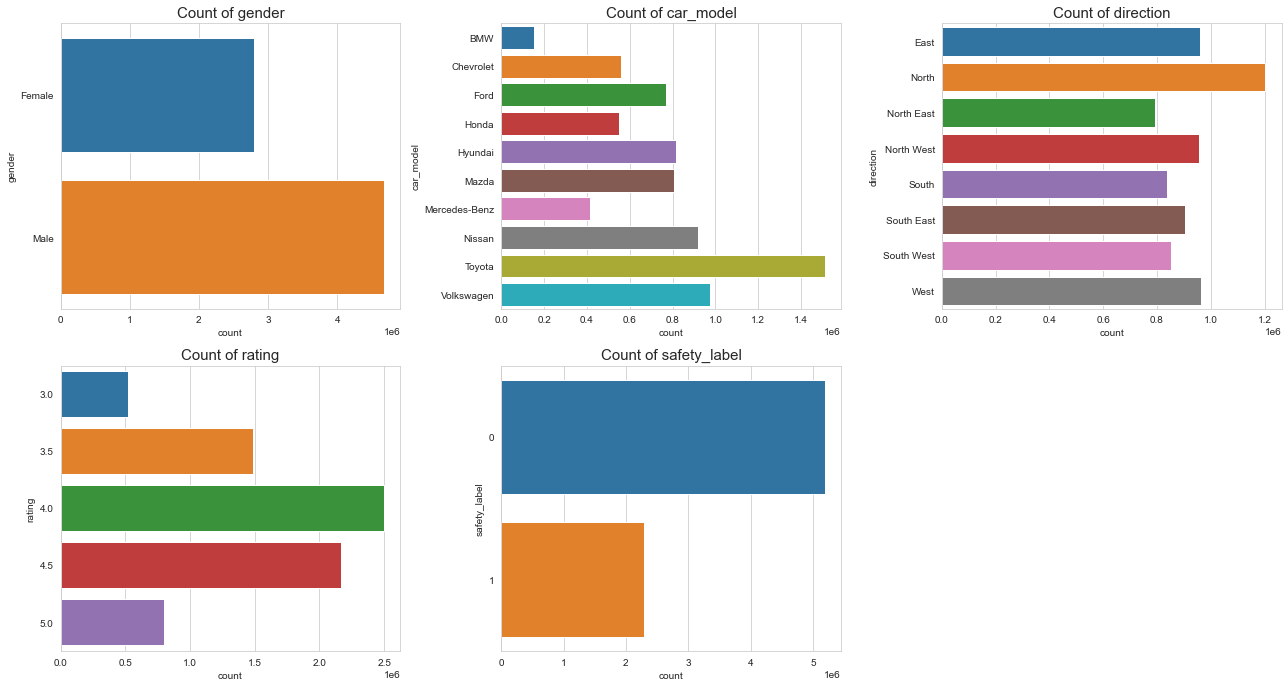

In [120]:
# countplot of all categorical columns
plt.figure(figsize=(18,14))
for i, col in enumerate(cat_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(y=col, data=taxi_df)
    plt.title(f"Count of {col}", fontsize=15)
    plt.tight_layout()
plt.show()

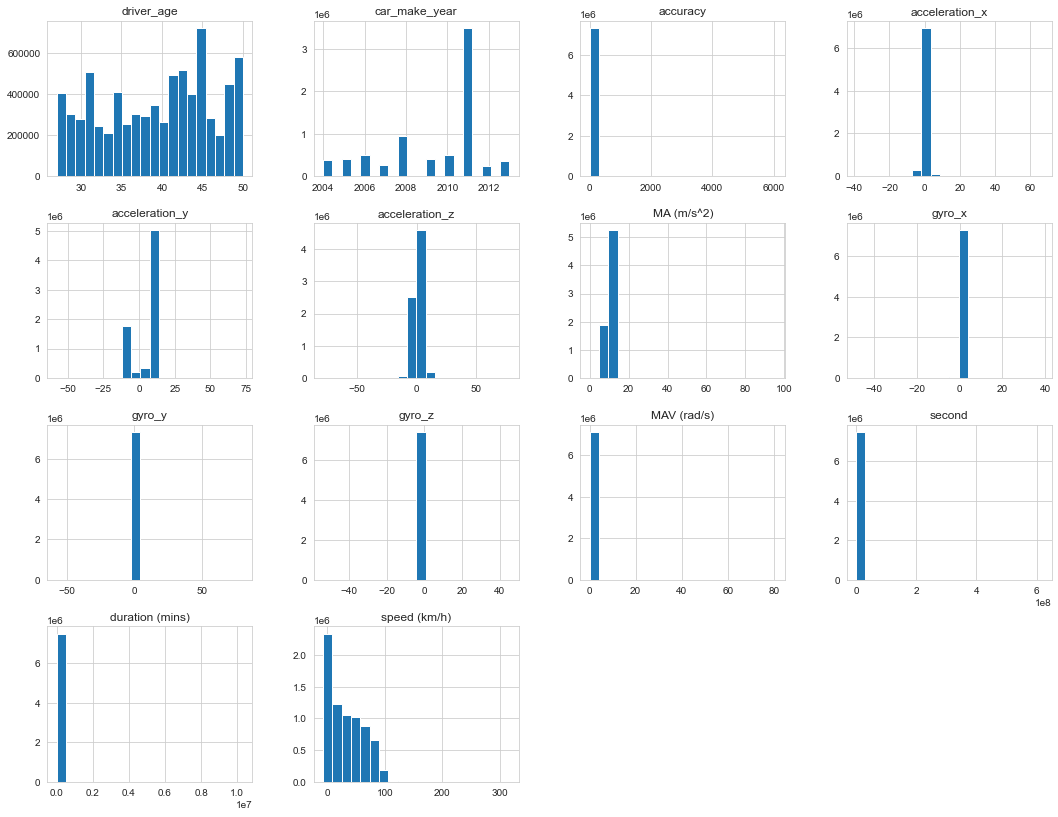

In [121]:
# histogram of all numerical columns
taxi_df.hist(figsize=(18,14), bins=20)
plt.show()

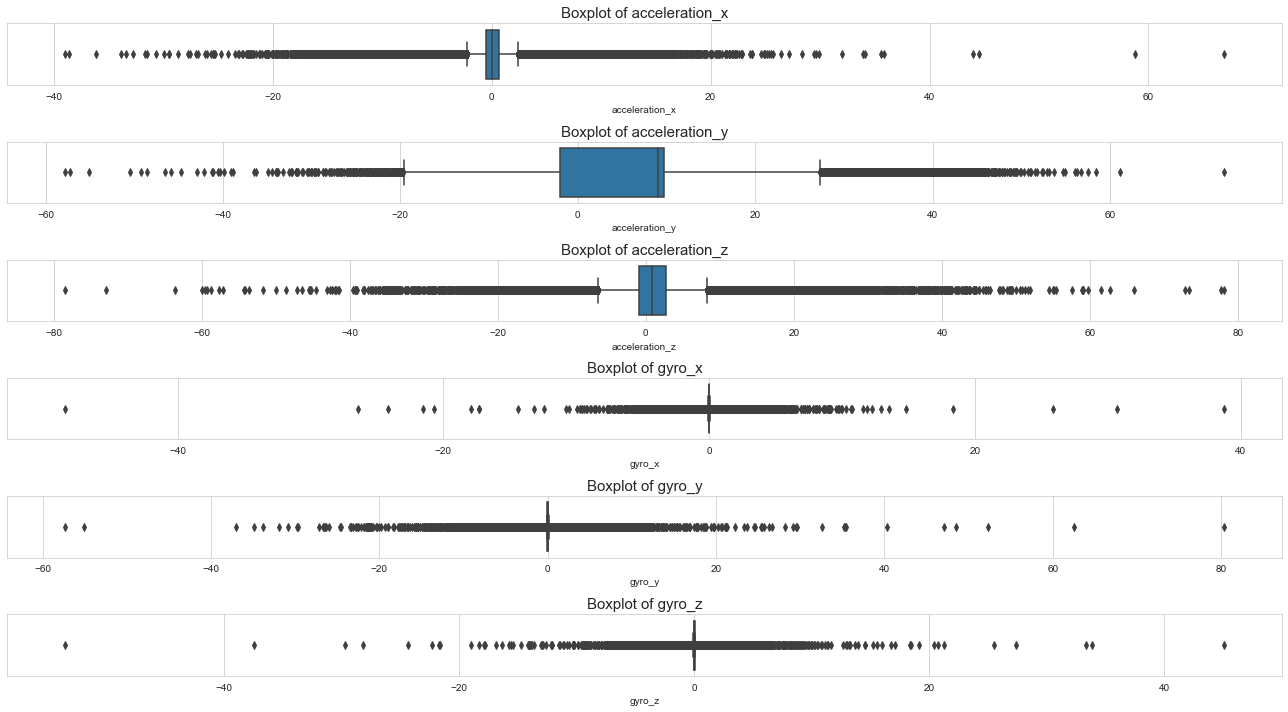

In [122]:
# boxplot of accel and gyro
plt.figure(figsize=(18,10))
for i, col in enumerate(['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']):
    plt.subplot(6,1,i+1)
    sns.boxplot(x=col, data=taxi_df)
    plt.title(f"Boxplot of {col}", fontsize=15)
    plt.tight_layout()
plt.show()

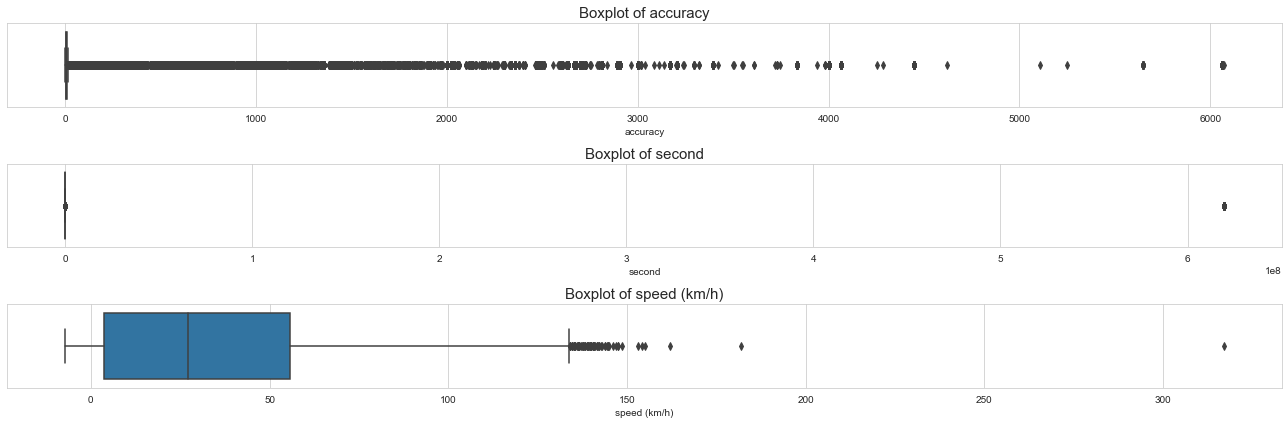

In [123]:
# boxplot of accuracy, second, speed
plt.figure(figsize=(18,6))
for i, col in enumerate(['accuracy', 'second', 'speed (km/h)']):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=col, data=taxi_df)
    plt.title(f"Boxplot of {col}", fontsize=15)
    plt.tight_layout()
plt.show()

In [129]:
# second count values
taxi_df['second'].value_counts()

0.0       9183
12.0      8857
8.0       8842
6.0       8820
10.0      8812
          ... 
5580.0       1
5578.0       1
5577.0       1
5575.0       1
4017.0       1
Name: second, Length: 6256, dtype: int64